In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('./fcc-forum-pageviews.csv', parse_dates=['date'],index_col='date')
df 

In [ ]:
# clean data, only take the inner quartile values
df = df[(df.value >= df.value.quantile(0.025))& (df.value <= df.value.quantile(0.975))]
df

In [ ]:
# draw line plot
fig, ax = plt.subplots()
sns.lineplot(
    data=df,
    x='date',
    y='value',
    ax=ax
)

ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

fig.set_figwidth(15)

In [ ]:
df

In [81]:
import datetime as dt
df_bar = df.reset_index()
df_bar

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [82]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


In [83]:
df_bar['year']= pd.DatetimeIndex(df_bar.date).year
df_bar

,date,value,year
0,2016-05-19,19736,2016
1,2016-05-26,18060,2016
2,2016-05-27,19997,2016
3,2016-05-28,19044,2016
4,2016-05-29,20325,2016
...,...,...,...
1233,2019-11-24,138875,2019
1234,2019-11-29,171584,2019
1235,2019-11-30,141161,2019
1236,2019-12-01,142918,2019


In [84]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
 2   year    1238 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 24.3 KB


In [85]:
df_bar['month'] = pd.DatetimeIndex(df_bar.date).month

In [86]:
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5
...,...,...,...,...
1233,2019-11-24,138875,2019,11
1234,2019-11-29,171584,2019,11
1235,2019-11-30,141161,2019,11
1236,2019-12-01,142918,2019,12


In [87]:
group_plot = df_bar.groupby(['month','year']).mean().reset_index()

In [95]:
group_plot['month']= pd.to_datetime(group_plot['month'],format='%m').dt.month_name()

c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

Text(0.5, 0, 'Years')

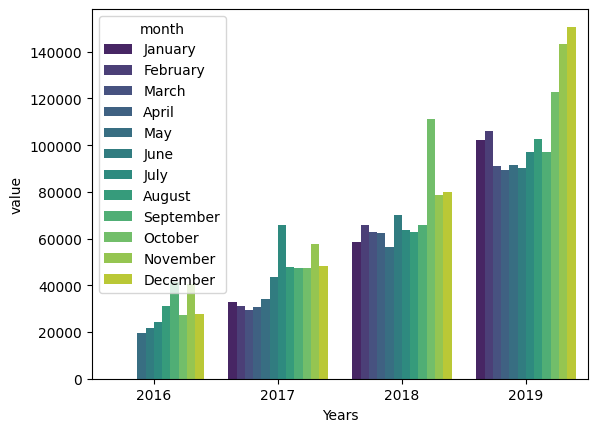

In [96]:
fig,ax = plt.subplots()
sns.barplot(
    data = group_plot,
    x='year',
    y='value',
    hue='month',
    palette='viridis',
    errorbar=None,
    ax=ax
)
ax.set_xlabel('Years')

Box plot

In [98]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [119]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
 2   year    1238 non-null   int64         
 3   month   1238 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 38.8+ KB


c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

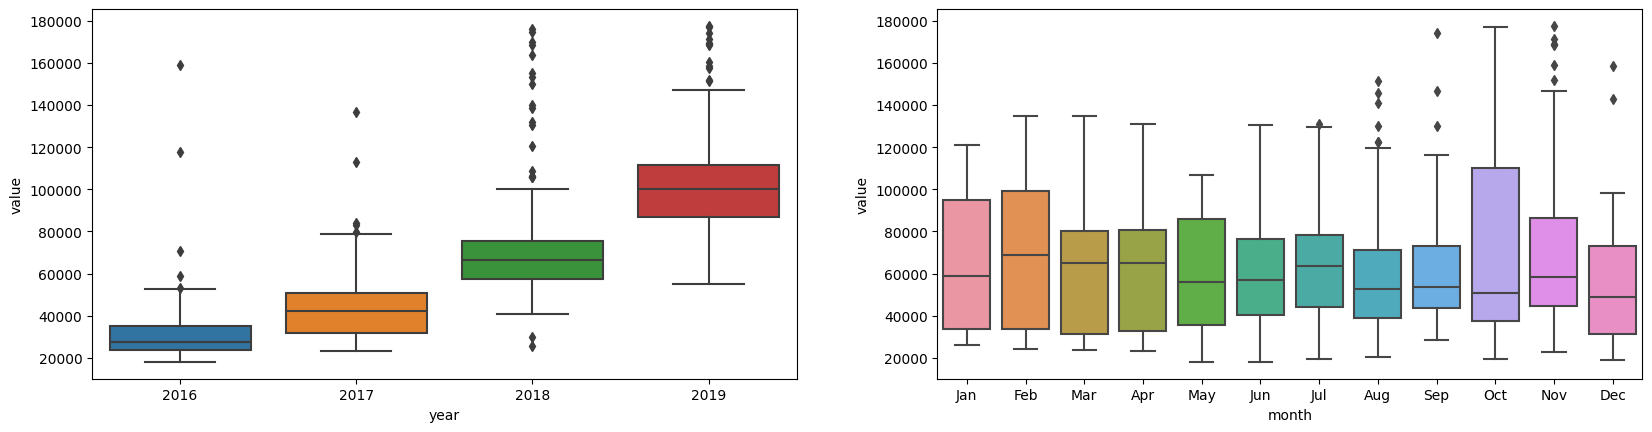

In [120]:
fig,(ax1,ax2) = plt.subplots(1,2)
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(
    data = df_box,
    x='year',
    y='value',
    ax=ax1
)
sns.boxplot(
    data = df_box,
    x='month',
    y='value',
    order=Months,
    ax=ax2
)
fig.set_figwidth(20)
fig.tight_layout = True